In [2]:
import math
import numpy as np
import sympy as sm
from sympy import Derivative, diff
import itertools
from itertools import groupby
import matplotlib.pyplot as plt
from tabulate import tabulate
from pprint import pprint
import TDMA

from IPython.display import display, Latex, clear_output

In [3]:
sm.init_printing(use_latex='mathjax')
x, y, t, l = sm.symbols('x, y, t, l', real=True)
C1, C2 = sm.symbols("C1, C2", real=True)
c = sm.symbols("c")
u = sm.Function('u')
ux = u(x)
ux1 = Derivative(u(x), x)
ux2 = Derivative(u(x), (x, 2))

h, uup1, uum1, uu0 = sm.symbols('h, u_i+1, u_i-1, u_i')

uup1, uum1, uu0

(uᵢ₊₁, uᵢ₋₁, uᵢ)

In [4]:
zad1 = {
    'a': 0, 'b': 2,
    'k': 0.5, 'T': 0.4,
    'fx': sm.lambdify(x, 1), 'fxt': 2, 'lambda_fxt': sm.lambdify([x, t], 2),
    'g1t': sm.lambdify(t, sm.exp(-t)), 'g2t': sm.lambdify(t, sm.exp(-5*t))
    
}

In [98]:
n = 9
m = 10
#hh = (zad1['b'] - zad1['a']) / (n-1)
#tt = zad1['T'] / (m-1)
#bb = zad1['k'] * tt / hh**2
uut1 = (uu0 - y)/(l)
uux2 = (uup1 - 2*uu0 + uum1)/(h**2)
#apro = sm.Eq(uut1, zad1['k']*uux2 + zad1['fxt'])

#us = sm.symbols(' '.join([f"u{i}" for i in range(n)]))
#list_x = [zad1['a'] + hh*i for i in range(n)]
#list_tt = [tt*i for i in range(m)]
#list_g1t = [zad1['g1t'](list_tt[i]) for i in range(m)]
#list_g2t = [zad1['g2t'](list_tt[i]) for i in range(m)]

#print(hh, tt)
#display(uut1, uux2)
#display(apro)
#print(us)
#print("list_x:", *list_x)
#print("list_tt:", *list_tt)
#print("list_g1t:", *list_g1t)
#print("list_g2t:", *list_g2t)

In [89]:
def get_tables(m, n):
    hh = (zad1['b'] - zad1['a']) / (n-1)
    ll = zad1['T'] / (m-1)
    bb = zad1['k'] * ll / hh**2
    uut1 = (uu0 - y)/(l)
    uux2 = (uup1 - 2*uu0 + uum1)/(h**2)
    #apro = sm.Eq(uut1, zad1['k']*uux2 + zad1['fxt'])
    apro2 = sm.Eq(uu0 - bb*(uup1 - 2*uu0 + uum1), y + ll*zad1['fxt'])

    us = sm.symbols(' '.join([f"u{i}" for i in range(n)]))
    list_x = [zad1['a'] + hh*i for i in range(n)]
    list_t = [ll*i for i in range(m)]
    list_g1t = [zad1['g1t'](list_t[i]) for i in range(m)]
    list_g2t = [zad1['g2t'](list_t[i]) for i in range(m)]
    
    table = np.zeros((m,n))
    for i in range(m):
        table[i][0] = list_g1t[i]
        table[i][n-1] = list_g2t[i]
    for i in range(1, n-1):
        table[0][i] = zad1['fx'](list_x[i])

    table1 = np.copy(table)
    table2 = np.copy(table)

    for i in range(1, m):
        for j in range(1, n-1):
            table1[i][j] = bb*(table1[i-1][j-1] + table1[i-1][j+1] - 2*table1[i-1][j]) + table1[i-1][j] + ll*zad1['lambda_fxt'](list_x[j], list_t[i])
    
    for i in range(1, m):
        tyts = []
        tyts.append(sm.Eq(us[0], table2[i][0]))
        tyts.extend([apro2.subs({x: list_x[j], t: list_t[i], y: table2[i-1][j], # h: hh, l: ll, 
                           uum1: us[j-1], uu0: us[j], uup1: us[j+1]})  for j in range(1,n-1)])
        tyts.append(sm.Eq(us[n-1], table2[i][n-1]))
        
        express = list(map(lambda t: TDMA.maper(t.lhs), tyts))
        TDMA.maper3(express, n)
        expr_values = list(map(lambda t: list(map(lambda t2: TDMA.maper2(t2), t)), express))
        f_values = list(map(lambda t: float(t.rhs), tyts))
        #print(tabulate(expr_values, floatfmt=".3"))
        a = [0] + [expr_values[i+1][i] for i in range(n-1)]
        b = [expr_values[i][i] for i in range(n)]
        c = [expr_values[i][i+1] for i in range(n-1)] + [0]
        xxx = TDMA.TDMA(*[a,b,c], f_values)
        
        for j in range(1, n-1):
            table2[i][j] = xxx[j]
            
    return table1, table2, {'hh': hh, 'll': ll, 'list_x': list_x, 'list_t': list_t}

In [99]:
m, n = 5, 15
table1, table2, args = get_tables(m, n)
print(tabulate(table1, floatfmt=".4"))
print(tabulate(table2, floatfmt=".4"))

------  --------  -------  ------  ---  ---  ---  ---  ---  ---  ---  ------  ------  -------  ------
1.0       1.0      1.0      1.0    1.0  1.0  1.0  1.0  1.0  1.0  1.0   1.0     1.0      1.0    1.0
0.9048    1.2      1.2      1.2    1.2  1.2  1.2  1.2  1.2  1.2  1.2   1.2     1.2      1.2    0.6065
0.8187    0.6769   1.4      1.4    1.4  1.4  1.4  1.4  1.4  1.4  1.4   1.4     1.4     -0.054  0.3679
0.7408    2.996   -0.1717   1.6    1.6  1.6  1.6  1.6  1.6  1.6  1.6   1.6    -1.962    4.742  0.2231
0.6703  -10.09    12.13    -2.541  1.8  1.8  1.8  1.8  1.8  1.8  1.8  -6.928  23.39   -22.55   0.1353
------  --------  -------  ------  ---  ---  ---  ---  ---  ---  ---  ------  ------  -------  ------
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  ------  ------  ------
1.0     1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0     1.0     1.0
0.9048  1.042  1.116  1.155  1.175  1.185  1.189  1.189  1.184  1.173  1.151

In [100]:
table3 = table1 - table2
table3 = np.where(table3 < 0, -table3, table3)
print(tabulate(table3, floatfmt=".4"))

---  -------  --------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  ---
0.0   0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0      0.0     0.0
0.0   0.1576   0.08427  0.04537  0.02499  0.01482  0.01068  0.01092  0.0156   0.02665  0.04859  0.09035   0.169    0.3166  0.0
0.0   0.3645   0.218    0.132    0.08137  0.05375  0.04201  0.04306  0.05723  0.08839  0.1448   0.2404    0.3972   0.8068  0.0
0.0   1.971    1.393    0.249    0.1667   0.1192   0.09847  0.1007   0.1266   0.1807   0.2725   0.4164    2.93     4.086   0.0
0.0  11.09    10.89     3.952    0.2766   0.2098   0.18     0.1834   0.2205   0.296    0.4185   8.127    22.45    23.15    0.0
---  -------  --------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  ---


In [101]:
np.amax(table3)

23.14682751869938

шаг h=0, шаг t=0.044444
шаг[10] t=0.400000


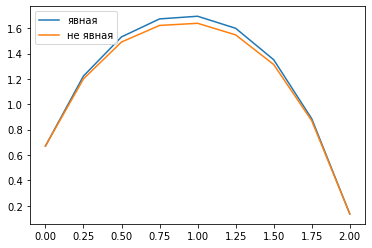

stop?: 


In [23]:
#def gen1(table1, table2):
#    for i in range(table3.shape[0]):
#        abc = yield (table1[i], table2[i])
#        print(abc)
            
#enu = gen1(table1, table2)
for i, (ar1, ar2) in enumerate(zip(table1, table2)):
    clear_output()
    #ar1, ar2 = next(enu)
    plt.plot(args['list_x'], ar1, label=f"явная")
    plt.plot(args['list_x'], ar2, label=f"не явная" )
    plt.legend(loc='upper left')
    print("шаг h=%d, шаг t=%f" % (args['hh'], args['ll']))
    print("шаг[%d] t=%f" %(i+1, args['list_t'][i]))
    plt.show()   
    #display(*solve1(zad1, n))
    if(input("stop?: ") != ''):
        break


шаг h=0, шаг l=0.100000
шаг[1] m=5, n=14


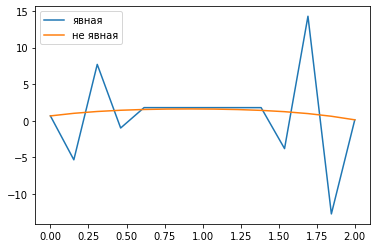

stop?: f


In [93]:
m, n = 5, 14
for i in itertools.count():
    clear_output()
    ar1, ar2, args2 = get_tables(m, n)
    plt.plot(args2['list_x'], ar1[m-1], label=f"явная")
    plt.plot(args2['list_x'], ar2[m-1], label=f"не явная" )
    plt.legend(loc='upper left')
    print("шаг h=%d, шаг l=%f" % (args2['hh'], args2['ll']))
    print("шаг[%d] m=%d, n=%d" %(i+1, m, n))
    #print(tabulate({"явная": ar1[m-1], "неявная": ar2[m-1], "погрешность": ar1[m-1] - ar2[m-1]}, headers='keys', tablefmt="github" , floatfmt=".5"))
    plt.show()   
    #display(*solve1(zad1, n))
    if(input("stop?: ") != ''):
        break
    n += 1

In [114]:
m, n = 15, 15
etable = [[None]*(1+n-2) for _ in range(m-1)]
for i in range(m-1):
    etable[i][0] = i+2

for i in range(m-1):
    #break
    for j in range(n-2):
        ar1, ar2, args2 = get_tables(i+2, j+3)
        ar3 = ar1 - ar2
        ar3 = np.where(ar3 < 0, -ar3, ar3)
        etable[i][1+j] = np.amax(ar3)
        
print(tabulate(etable , headers=['m\\n']+[i+3 for i in range(n-2)], floatfmt=".4"))

  m\n        3        4        5        6        7        8        9       10       11       12       13       14      15
-----  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  ------
    2  0.3992   0.4848   0.6126   0.7279   0.8252   0.9062   0.9741   1.031    1.08     1.122    1.159     1.191    1.219
    3  0.1836   0.1994   0.2621   0.3175   0.3857   0.4645   0.6973   1.075    1.513    2.011    2.565     3.177    3.844
    4  0.1206   0.1303   0.154    0.1823   0.2243   0.2624   0.5008   1.022    1.874    3.153    4.968     7.433   10.68
    5  0.08998  0.0971   0.1135   0.1191   0.1498   0.1783   0.3028   0.7701   1.817    3.846    7.418    13.33    23.15
    6  0.07181  0.07743  0.09017  0.09255  0.1075   0.1298   0.1506   0.3483   1.244    3.838    9.875    22.48    46.71
    7  0.05977  0.06442  0.07487  0.07687  0.08134  0.099    0.1159   0.1566   0.7033   2.896    9.855    28.66    73.84
    8  0.05119  0.05516  0.0